In [3]:
import folium
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
latitude, longitude = (37.468251,126.886212)

In [5]:
m = folium.Map(location=[latitude, longitude],
zoom_start=17,
width=750,
height=500
)
folium.Marker([latitude, longitude],
popup="플레이데이터",
tooltip="플레이데이터").add_to(m)
m

In [6]:
survey_raw_df = pd.read_csv('../data/stack-overflow-developer-survey-2022/survey_results_public.csv', index_col='ResponseId')

In [7]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [8]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country': country_counts.index,
'Count': country_counts.values})
country_counts_df

Country  Count
0                             United States of America  13543
1                                                India   6639
2                                              Germany   5395
3    United Kingdom of Great Britain and Northern I...   4190
4                                               Canada   2490
..                                                 ...    ...
175                                             Monaco      1
176                                           Djibouti      1
177                                         Seychelles      1
178                                    Solomon Islands      1
179                              Saint Kitts and Nevis      1

[180 rows x 2 columns]

In [9]:
country_counts_df.at[12, 'Country']

'Russian Federation'

In [10]:
country_counts_df.at[12, 'Country'] = 'Russia'

In [11]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=['Country', 'Count'],  # 앞에 반영할 기준을 넣어주고 뒤에 수치를 넣어준다.
    key_on='feature.properties.name',
    threshold_scale=[1, 30 ,100, 300, 1_000, 3_000, 10_000, 14_000], # 모든 값을 포함할 수 있게 범위를 설정해줘야한다.
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Respondents',
).add_to(m)

folium.LayerControl().add_to(m)
m

In [12]:
m.save('Country.html') # 지도 결과 저장하기

In [13]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)
folium.Choropleth(
    geo_data=seoul_geojson,       # 서울시 행정구역을 그리도록 넣어주고 있습니다.
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

# Wordcloud

In [14]:
conda list

# packages in environment at c:\Users\PlayData\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2022.10                  py39_0  
anaconda-client           1.11.0           py39haa95532_0  
anaconda-navigator        2.3.1            py39haa95532_0  
anaconda-project          0.11.1           py39haa95532_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow                     1.2.2              pyhd3eb1b0_0  
astroid                   2.11.7           py39haa95532_0  
astropy                   5.1              py39h080aedc_0  
atomicwrites              1.4.0                      py_0  
attrs                     21.4.0 

In [15]:
from wordcloud import WordCloud

In [19]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [20]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

Country  \
ResponseId                                                      
1                                                         NaN   
2                                                      Canada   
3           United Kingdom of Great Britain and Northern I...   
4                                                      Israel   
5                                    United States of America   
...                                                       ...   
73264                                                 Nigeria   
73265                                United States of America   
73266                                United States of America   
73267       United Kingdom of Great Britain and Northern I...   
73268                                                  Canada   

                        Age Gender  \
ResponseId                           
1                       NaN    NaN   
2                       NaN    NaN   
3           25-34 years old    Man   
4           35-44 years old    Man   
5           25-34 years old    NaN   
...                     ...    ...   
73264       25-34 years old    Man   
73265       25-34 years old    Man   
73266       55-64 years old    Man   
73267       55-64 years old    Man   
73268       25-34 years old    Man   

                                                    EdLevel YearsCode  \
ResponseId                                                              
1                                                       NaN       NaN   
2                                                       NaN       NaN   
3           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        14   
4              Bachelor’s degree (B.A., B.S., B.Eng., etc.)        20   
5              Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
...                                                     ...       ...   
73264          Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
73265       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         6   
73266          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        42   
73267          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        50   
73268          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        16   

           YearsCodePro                             LanguageHaveWorkedWith  \
ResponseId                                                                   
1                   NaN                                                NaN   
2                   NaN                              JavaScript;TypeScript   
3                     5                  C#;C++;HTML/CSS;JavaScript;Python   
4                    17                       C#;JavaScript;SQL;TypeScript   
5                     3        C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript   
...                 ...                                                ...   
73264                 5  Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...   
73265                 5          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   
73266                33                 HTML/CSS;JavaScript;PHP;Python;SQL   
73267                31                                      C#;Delphi;VBA   
73268                 5        C#;JavaScript;Lua;PowerShell;SQL;TypeScript   

                                    LanguageWantToWorkWith  \
ResponseId                                                   
1                                                      NaN   
2                                          Rust;TypeScript   
3                    C#;C++;HTML/CSS;JavaScript;TypeScript   
4                                        C#;SQL;TypeScript   
5               C#;Elixir;F#;Go;JavaScript;Rust;TypeScript   
...                                                    ...   
73264       Bash/Shell;Go;JavaScript;Python;SQL;TypeScript   
73265                           HTML/CSS;JavaScript;Python   
73266                C#;HTML/CSS;JavaScript;PHP;Python;SQL   
73267                                               Delphi   
7326

In [21]:
survey_df["YearsCode"].replace('Less than 1 year', 0, inplace=True)
survey_df["YearsCode"].replace('More than 50 years', 51, inplace=True)
survey_df["YearsCode"] = survey_df["YearsCode"].astype('f')

In [22]:
survey_df["YearsCodePro"].replace('Less than 1 year', 0, inplace=True)
survey_df["YearsCodePro"].replace('More than 50 years', 51, inplace=True)
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].astype('f')


In [23]:
temp_words = survey_raw_df['DevType'].dropna()
temp_words = temp_words.str.replace(';',' ').str.replace(',',' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [32]:
# 보기 너비 증가
pd.describe_option()


compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [35]:
words = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

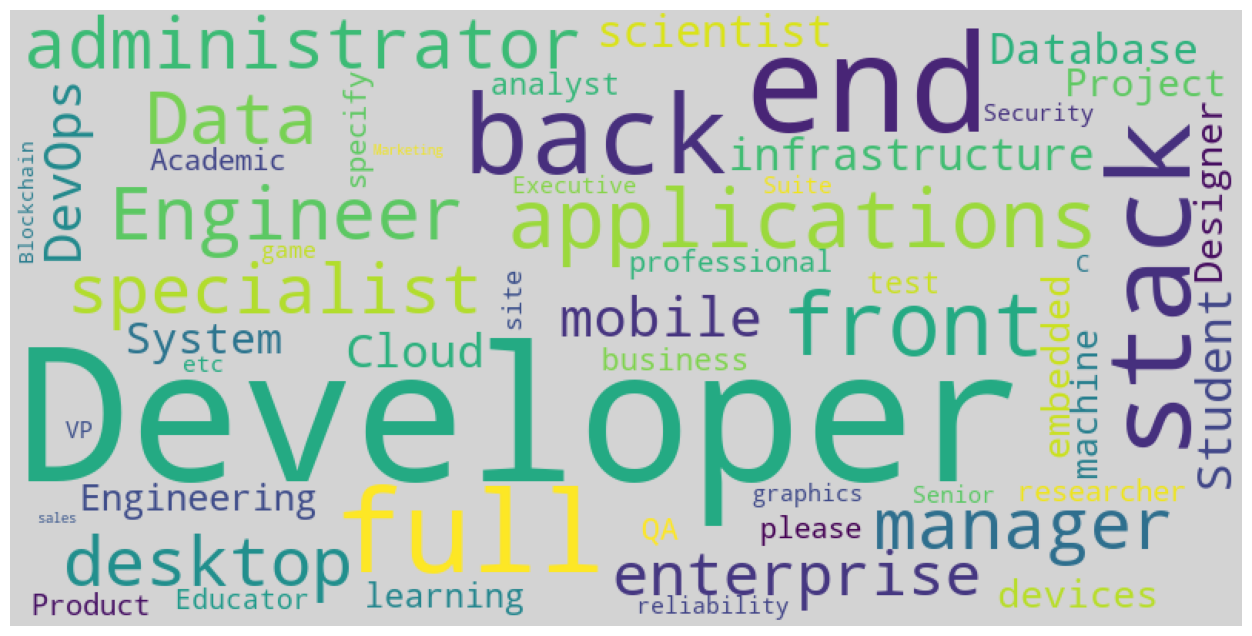

In [26]:
wc = WordCloud(collocation_threshold=int(1e6),
width=800, height=400,
background_color='lightgrey').generate(words)

plt.figure(figsize=(16,8))

plt.axis('off')

plt.grid(False)
plt.imshow(wc)
plt.show()

In [27]:
wc.to_file('DevType.png')  # 이 명령어로 저장 가능합니다. 다른 이미지 확장자로도 가능합니다.